# Cellular plan analysis

The purpose of this project is to carry out preliminary analysis of two prepaid plans, Surf and Ultimate, in order to find out which of the plans brings in more revenue. 

Data sources:  
/datasets/megaline_calls.csv  
/datasets/megaline_internet.csv  
/datasets/megaline_messages.csv  
/datasets/megaline_plans.csv  
/datasets/megaline_users.csv

**Steps to be taken:** 
1. Examine the data - get general impression.
2. Fix any issues with the data, such as missing values or others, if will be found.
3. Enrich the data with additional variables and columns in order to conduct calculations and analysis. 
4. Aggregate the data into fewer data files in order to be able to see the complete data and run calculations.
5. Conduct exploratory data analysis and draw conclusions based on visualization. 
6. Conduct statistical data analysis comparing the revenues from the two plans to find out which of the plans brings in more revenue. 

The main hypothesis is that there is a difference between the revenue from the two plans, and a cheaper plan brings in more revenue, as its users will tend to exceed their limit more.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns
from functools import reduce
from scipy import stats

## Loading data

We have five data files. Let's load them and save them into five different dataframes.

In [2]:
# Loading the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
msgs = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparing the data

The data is split into several tables. Let's explore each one to get an initial understanding of the data.

**Calls**

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.duration.describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [5]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


From the data we see that there's a minimum of 0.0 minutes call duration. Let's check how many such rows we have.

In [6]:
calls[calls['duration'] == 0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


The 0.0 minutes duration calls must be calls that were made, but the other side didn't pick up. No minutes were charged.

**Internet**

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
internet.mb_used.describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

**Messages**

In [10]:
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
msgs.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Users data**

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Plans

In [14]:
# General/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [15]:
# Sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Data Description**

**Calls:**   
1. About 27.000 rows with 0.0 call duration. Should be investigated further.  
2. The call_date column is an object. We may want to change the data type to datetime for further calculations.

**Internet:**   
1. The session_date column is an object. We may want to change the data type to datetime for further calculations.

**Messages:**   
1. The message_date column is an object. We may want to change the data type to datetime for further calculations.   

**Users:**   
1. From the users' data most probably we will need user id's and plan assignment. 
2. Missing values in churn_date column. This column most probably won't be needed for analysis. It's possible tp delete it, but we will leave it as is.

**Plans:**   
1. The interned data used is in mb, however, the charge is for gb. We will have to convert the mb used into gb.   


## Users

In [16]:
# General/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# Sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


There aren't any obvious issues with the data. We might want changed the data type of reg_date column from object to datetime.

### Fixing Data

In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

The churn_date column contains very little data point. The rest can't be restored. We could change the data type in this column as well, but it's impossible to use this column for its poor amount of data. Therefore, we will leave the data as it is.

### Enriching Data

Since the data is for year 2018. Let's add registration month, just in case.

In [20]:
users['reg_month']=pd.to_datetime(users['reg_date']).dt.month
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5


## Calls

In [21]:
# General/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [23]:
calls[calls['duration'] == 0].count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [24]:
# Sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Fixing data

Let's first change the data type of call_date column to datetime type and format.

In [25]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [26]:
calls[calls['duration'] == 0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


As was mentioned above, about 27.000 rows with 0.0 call duration. Those must be calls which were made but were unanswered, and no minutes were charged. We will leave this values as they are.

### Enriching data

We will add a column with month of the call to be able to calculate number of calls per month.

In [27]:
calls['month']=pd.to_datetime(calls['call_date']).dt.month
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


Per plan description, the charge is per minute, even if a call lasted just one second. Therefore, we'll create a column with a number of full minutes per call to be able to calculate monthly revenue from calls later in this project.

In [28]:
calls['full_minutes'] = np.ceil(calls['duration']).astype(int)
calls.head()

,id,user_id,call_date,duration,month,full_minutes
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


## Messages

In [29]:
# General/summary information about the messages' DataFrame
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Sample of data for messages
msgs.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


message_date column is an object type and should be converted to timedate type.

### Fixing data

We will convert the message_date into datetime data type.

In [31]:
msgs['message_date'] = pd.to_datetime(msgs['message_date'], format='%Y-%m-%d')

### Enriching data

We will add a column with month of the message to be able to calculate number of messages per month.

In [32]:
msgs['month']=pd.to_datetime(msgs['message_date']).dt.month
msgs.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [33]:
# General/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
# Sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [35]:
internet.mb_used.describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [36]:
internet.query('mb_used == 0')

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


1. session_date column is an object type and should be converted to timedate type.   
2. About 14.000 internet sessions with 0.0 mb_used. Per plan description, mb's are rounded up to gb's, and individual sessions are not rounded up. Therefore, we will leave this data as is.

### Fixing data

We will convert the session_date into datetime data type.

In [37]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriching data

We will add a column with month of the session to be able to calculate total mb used per month.

In [38]:
internet['month']=pd.to_datetime(internet['session_date']).dt.month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Studying plan conditions

We will print out the plan information to view their conditions once again.

In [39]:
# Print out the plan conditions and make sure they are clear for you
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [40]:
plans.T

,0,1
messages_included,50,1000
mb_per_month_included,15360,30720
minutes_included,500,3000
usd_monthly_pay,20,70
usd_per_gb,10,7
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01
plan_name,surf,ultimate


From the plan data we can see that even though the Surf plan is cheaper, 
its users pay more for exceeding the usage included in the plan.

To remember:   

Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Aggregating data per user

Now, as the data is clean, in order to ease the further analysis, we will aggregate data per user per month in order to have just one record per user per month.

In [41]:
# Calculating the number of calls made by each user per month.
calls_monthly=calls.groupby(['user_id','month'])['id'].count().reset_index()
calls_monthly.columns = ['user_id', 'month', 'calls']
calls_monthly

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [42]:
# Calculating the amount of minutes spent by each user per month.
calls_min_monthly = calls.groupby(['user_id','month'])['full_minutes'].sum().reset_index()
calls_min_monthly.columns = ['user_id', 'month', 'minutes_charged']
calls_min_monthly

,user_id,month,minutes_charged
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [43]:
# Calculating the number of messages sent by each user per month
msgs_monthly = msgs.groupby(['user_id','month'])['id'].count().reset_index()
msgs_monthly.columns = ['user_id', 'month', 'messages']
msgs_monthly

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [44]:
# Calculating the volume of internet traffic used by each user per month.
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly.columns = ['user_id', 'month', 'total_mb_used']
internet_monthly

,user_id,month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


We will put the aggregate data together into one DataFrame so that one record in it would represent what a unique user consumed in a given month.

In [45]:
# Merging the data for calls, minutes, messages, and internet based on user_id and month
data_frames = [calls_monthly, calls_min_monthly, msgs_monthly, internet_monthly]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


**Now we have a complete data on plan users for users for each month.**

In [46]:
# Adding the plan information
user_plans = users[['user_id', 'plan']]
user_plans.columns = ['user_id', 'plan_name']
user_plans

,user_id,plan_name
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [47]:
#Merging calls data and user plan info for later analysis of call duration per plan.
data_frames = [calls, user_plans]
call_durations_plan = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='inner'), data_frames)
call_durations_plan

,id,user_id,call_date,duration,month,full_minutes,plan_name
0,1000_93,1000,2018-12-27,8.52,12,9,ultimate
1,1000_145,1000,2018-12-27,13.66,12,14,ultimate
2,1000_247,1000,2018-12-27,14.48,12,15,ultimate
3,1000_309,1000,2018-12-28,5.76,12,6,ultimate
4,1000_380,1000,2018-12-30,4.22,12,5,ultimate
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9,surf
137731,1499_200,1499,2018-10-20,10.89,10,11,surf
137732,1499_201,1499,2018-09-21,8.12,9,9,surf
137733,1499_202,1499,2018-10-10,0.37,10,1,surf


In [48]:
#Merging a plan usage information per user per month and plan info on user_id column.
df_merged = df_merged.merge(right=user_plans, on='user_id', how='left')
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,surf
2,1001,9,49.0,315.0,44.0,13314.82,surf
3,1001,10,65.0,393.0,53.0,22330.49,surf
4,1001,11,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,surf
2289,1361,5,NaN,NaN,2.0,1519.69,surf
2290,1482,10,NaN,NaN,2.0,NaN,ultimate
2291,1108,12,NaN,NaN,NaN,233.17,ultimate


In [49]:
#Let's also merge the complete usage table with the plans table in order to be able to make revenue calculations later.
df_merged = df_merged.merge(right=plans, on='plan_name', how='left')
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03
2289,1361,5,NaN,NaN,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03
2290,1482,10,NaN,NaN,2.0,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,NaN,NaN,NaN,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01


In [50]:
df_merged = df_merged.fillna(0)
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01


In [51]:
df_merged['plan_name'].value_counts()

surf        1573
ultimate     720
Name: plan_name, dtype: int64

In [52]:
def gb_charged_calc(row):
    """
    The function will calculate the number of gb of internet trafic to be charged 
    based on the formula: total_mb_used - mb_per_month_included)/1024 (converting mb into gb)
    If (total_mb_used - mb_per_month_included) > 0 (the user has exceeded the included traffic), 
    the calculation formula will be applied. 
    Else: (the user did not exceed the included monthly traffic), the gb_charged will be 0.
    """
    total_mb_used = row['total_mb_used']
    mb_per_month_included = row['mb_per_month_included']
        
    if (total_mb_used - mb_per_month_included) > 0:
        return np.ceil((total_mb_used - mb_per_month_included)/1024)
    else:
        return 0

Let's use the fuction to add a column gb_charged - how many gb of internet data a user will be charged for.

In [53]:
df_merged['gb_charged']=df_merged.apply(gb_charged_calc,axis=1)
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,7.0
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0


In [54]:
def revenue_calc(row):
    
    """
    The function will calculate monthly revenue for every user for every distinc month,
    using the following formulas:
    - Total monthly revenue from all calls, messages, and traffic, including permanent monthly payment is:
    total_monthly_revenue = calls_revenue + msgs_revenue + internet_revenue + monthly_pay
    - Total revenue from calls is calculated using the following formula:
    calls_revenue = (row['minutes_charged'] - row['minutes_included'])*row['usd_per_minute']
    If row['minutes_charged']>row['minutes_included'] (the user did not exceed the number of 
    minutes included in the plan), the call revenue will be 0.
    - Total revenue from messages is calculated using the following formula:
    msgs_revenue = (row['messages'] - row['messages_included'])*row['usd_per_message']
    If row['messages']>row['messages_included'] (the user did not exceed the number of 
    nessages included in the plan), the messages revenue will be 0.
    - The internet revenue will be calculated using the following formula:
    internet_revenue = row['gb_charged']*row['usd_per_gb']
    ***The exact number of gb to be charged has been prviously calculated.
    - Monthly plan payment (permanent) is monthly_pay = row['usd_monthly_pay']
    The fuction will return total_monthly_revenue.
    """
    
    if row['minutes_charged']>row['minutes_included']:
        calls_revenue = (row['minutes_charged'] - row['minutes_included'])*row['usd_per_minute']
    else:
        calls_revenue=0
    if row['messages']>row['messages_included']:
        msgs_revenue = (row['messages'] - row['messages_included'])*row['usd_per_message']
    else:
        msgs_revenue = 0
        
    internet_revenue = row['gb_charged']*row['usd_per_gb']
    monthly_pay = row['usd_monthly_pay']
    total_monthly_revenue = calls_revenue + msgs_revenue + internet_revenue + monthly_pay
    return total_monthly_revenue

In [55]:
# Calculating the monthly revenue for each user, we will add a column and apply the function above.
df_merged['total_monthly_revenue']=df_merged.apply(revenue_calc,axis=1)
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,7.0,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00


## Studying user behaviour

Let's calculate some useful descriptive statistics for the aggregated and merged data, which will reveal an overall picture captured by the data. We will draw plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots will be calculated on a per-plan basis.

### Calls

**We will compare average duration of calls per each plan per each distinct month and build a bar chart to visualize the comparison.**

Text(0.5, 0, 'months')

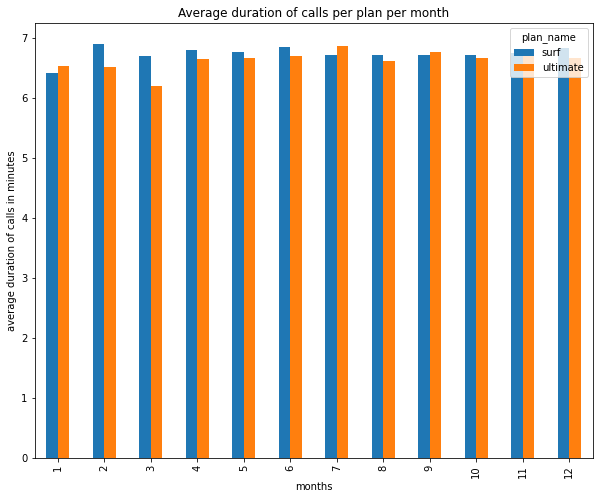

In [56]:
avg_calls_duration=call_durations_plan.pivot_table(index='month', columns='plan_name', values='duration', aggfunc='mean').plot(kind='bar', figsize=(10,8))
avg_calls_duration
plt.title('Average duration of calls per plan per month')
plt.ylabel('average duration of calls in minutes')
plt.xlabel('months')

In [57]:
avg_calls_duration_pivot=call_durations_plan.pivot_table(index='month', columns='plan_name', values='duration', aggfunc='mean')
avg_calls_duration_pivot

plan_name,surf,ultimate
month,,
1,6.428000,6.541518
2,6.906175,6.517230
3,6.696919,6.210906
4,6.799918,6.659990
5,6.769200,6.662443
6,6.846812,6.705188
7,6.721710,6.879085
8,6.726164,6.613484
9,6.728684,6.770040


In [58]:
call_durations_plan.groupby(['plan_name'])['duration'].mean()

plan_name
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64

- The Surf plan has the longest average call duration, comparing to the Ultimate plan. 
- The longest average calls for Surf users are in February: maybe because of all the calls made during the St.Valentines.
They are also longer than the average calls made by Ultimate plan users during the same month.
- The Surf plan users on average also make longer calls in June and December: 
maybe because of all the X-mas and New Year's congratulations.
- The longest calls for the Ultimate plan users are during July - maybe during summer vacations. 
The calls in July are also longer than the calls made by Surf plan users.

**We will compare the number of minutes users of each plan require each month and plot a histogram to visualize the comparison.**


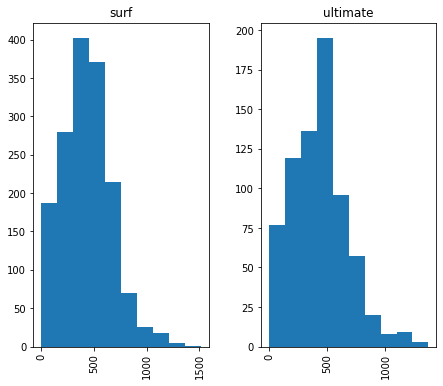

In [59]:
 df_merged.minutes_charged.hist(by=df_merged['plan_name'], figsize=(7,6));

Text(0.5, 0, 'Monthly minutes charged')

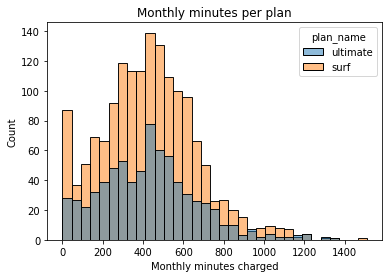

In [60]:
sns.histplot(df_merged,x='minutes_charged',hue='plan_name')
plt.title('Monthly minutes per plan')
plt.xlabel('Monthly minutes charged')

In [61]:
df_merged.groupby(['plan_name'])['minutes_charged'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


In [62]:
minutes = df_merged.pivot_table(index='month', values = 'minutes_charged', columns = 'plan_name', aggfunc = 'mean')
minutes

plan_name,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


**Let's also visualize the average number of minutes users of each plan require by month by plotting a bar chart.**

Text(0.5, 0, 'months')

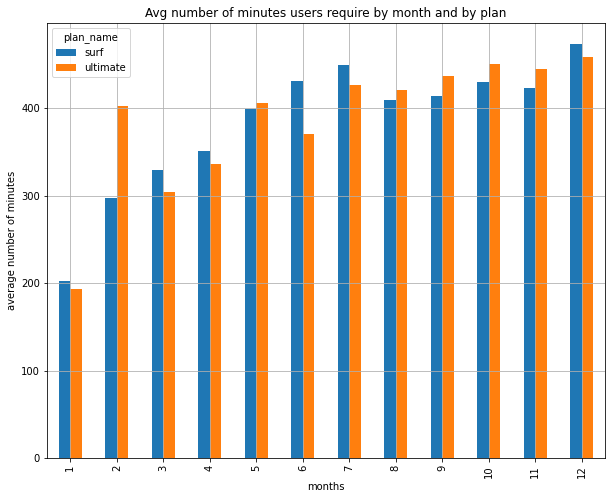

In [63]:
minutes.plot(kind='bar', grid=True, figsize=(10,8))
plt.title('Avg number of minutes users require by month and by plan')
plt.ylabel('average number of minutes')
plt.xlabel('months')

In [64]:
df_merged.groupby('plan_name')['calls'].mean()

plan_name
surf        59.811825
ultimate    60.626389
Name: calls, dtype: float64

From the data it is evident that the Surf plan users require on average slightly less minutes, comparing to the Ultimate plan users, even though they have significantly less minutes included in their plan. Despite the fact that Surf plan users require on average slightly less minutes each month, it stand from the data that the difference between the mean and the median in monthly minutes is greater for Ultimate plan users. The mean is greater than the median, which means that it's affected by the outliers. This means that more Ultimate users tend to use more minutes.
The month with the highest minutes usage is December for both plans, probably because of the holidays. However, Surf users require more minutes in December comparing to Ultimate users.     
For Ultimate users February and December are the months with the highest number of minutes used: probably because of St. Valentines in February and Xmas and New Year's in December. For Surf users these are July and December. No love calls in February for Surf users, maybe, because they don't love anyone (kidding :)))
In general on average, Ultimate plan users use slightly more minutes and make more calls every month.

**We will calculate the mean and the variance of the call duration for each plan to reason on whether users on the different plans have different behaviours for their calls.**

In [65]:
# Calculating the mean and the variance of the monthly call duration
mean_surf=avg_calls_duration_pivot['surf'].mean()
var_surf=avg_calls_duration_pivot['surf'].var()

mean_ult=avg_calls_duration_pivot['ultimate'].mean()
var_ult=avg_calls_duration_pivot['ultimate'].var()

print('Surf plan')
print("Average call duration for 'surf' plan is",mean_surf)
print("Variance for 'surf' plan is",var_surf)
print()
print('Ultimate plan')
print("Average call duration for 'ultimate' plan is",mean_ult)
print("Variance for 'ultimate' plan is",var_ult)

Surf plan
Average call duration for 'surf' plan is 6.745134009024248
Variance for 'surf' plan is 0.01391044791023971

Ultimate plan
Average call duration for 'ultimate' plan is 6.636680677937406
Variance for 'ultimate' plan is 0.027353052035413727


It is evident from the data that in Surf plan the mean call duration is greater (6.75) comparing to the Ultimate plan (6.64). However, the variance in Ultimate plan is greater than in Surf plan. This means that more Ultimate users tend to make longer calls. Which is logical, as the plan includes more minutes.

**Let's plot a boxplot to visualize the distribution of the monthly call duration**

Text(0.5, 0, 'plans')

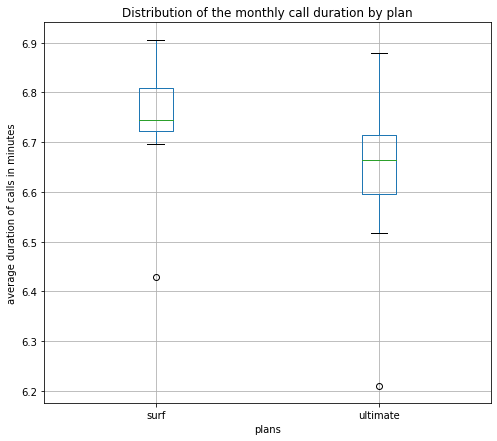

In [66]:
avg_calls_duration_pivot.plot(kind='box', figsize=(8,7), grid=True)
plt.title('Distribution of the monthly call duration by plan')
plt.ylabel('average duration of calls in minutes')
plt.xlabel('plans')

In [67]:
call_durations_plan.groupby('plan_name')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,94084.0,6.767264,5.844397,0.0,1.32,6.01,10.71,37.60
ultimate,43651.0,6.699939,5.827914,0.0,1.23,5.92,10.66,36.24


Text(0.5, 6.79999999999999, 'months')

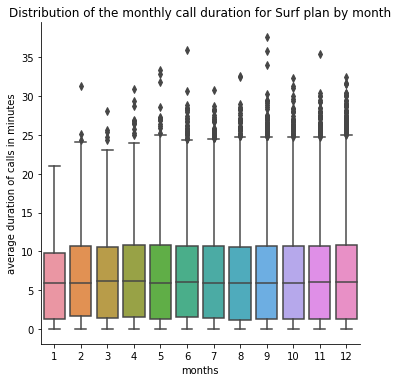

In [68]:
duration_surf = call_durations_plan.query('plan_name == "surf"')
sns.catplot(y='duration', x='month', data=duration_surf, kind='box')
plt.title('Distribution of the monthly call duration for Surf plan by month')
plt.ylabel('average duration of calls in minutes')
plt.xlabel('months')

Text(0.5, 6.79999999999999, 'months')

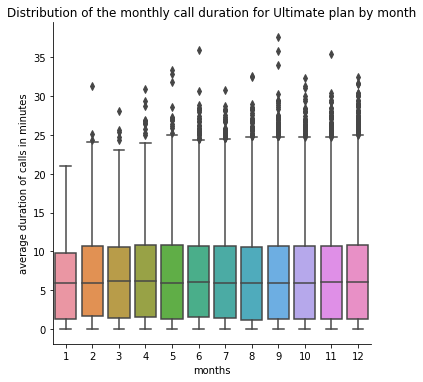

In [69]:
duration_ult = call_durations_plan.query('plan_name == "ultimate"')
sns.catplot(y='duration', x='month', data=duration_surf, kind='box')
plt.title('Distribution of the monthly call duration for Ultimate plan by month')
plt.ylabel('average duration of calls in minutes')
plt.xlabel('months')

The IQR the Surf users' call duration is smaller than for Ultimate users. The variance is smaller than for the Ultimate users, thus, the majority of users are concentrated around the average. From the graph we can't see the outliers on the upper side. However, calls below 6.7 min are considered to be outliers. The Surf users maybe avoid making short unnecessary calls not to waste minutes, as even a part or a minute is charged as a full minute. 
As for the Ultimate user, the lower side outliers are as low as 6.4 mintues, which means that the Ultimate plan users don't hesitate to make shorter calls. The variance from the mean is greater comparing to the Surf plan, and there're outliers on the upper side, which means more Ultimate users tend to make longer calls.

### Messages

**Let's compare the number of messages users of each plan tend to send each month. Let's plot a boxplot to visualize the distribution of the monthly messages sent by users**

Text(0.5, 0, 'plans')

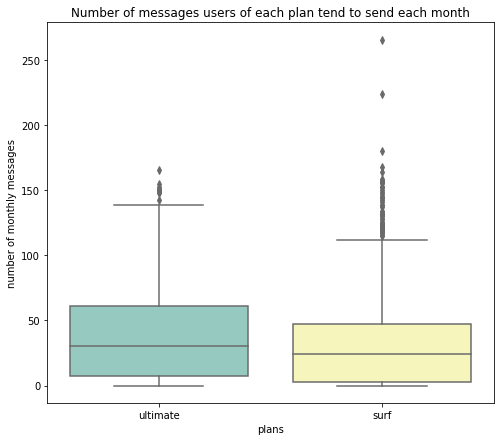

In [70]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan_name',y="messages",
                 data=df_merged, palette="Set3")
plt.title('Number of messages users of each plan tend to send each month')
plt.ylabel('number of monthly messages')
plt.xlabel('plans')

In [71]:
df_merged.groupby('plan_name')['messages'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


In [72]:
mean_surf_msgs=df_merged.query('plan_name == "surf"')['messages'].mean()
var_surf_msgs=df_merged.query('plan_name == "surf"')['messages'].var()

mean_ult_msgs=df_merged.query('plan_name == "ultimate"')['messages'].mean()
var_ult_msgs=df_merged.query('plan_name == "ultimate"')['messages'].var()

print('Surf plan')
print("Average number of monthly messages for 'surf' plan is",mean_surf_msgs)
print("Variance for 'surf' plan is",var_surf_msgs)
print()
print('Ultimate plan')
print("Average number of monthly messages for 'ultimate' plan is",mean_ult_msgs)
print("Variance for 'ultimate' plan is",var_ult_msgs)

Surf plan
Average number of monthly messages for 'surf' plan is 31.15956770502225
Variance for 'surf' plan is 1126.7245219504066

Ultimate plan
Average number of monthly messages for 'ultimate' plan is 37.55138888888889
Variance for 'ultimate' plan is 1208.756743548138


In [73]:
df_merged.pivot_table(index='month', values='messages', columns = 'plan_name', aggfunc = 'mean')

plan_name,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


Text(0.5, 6.79999999999999, 'months')

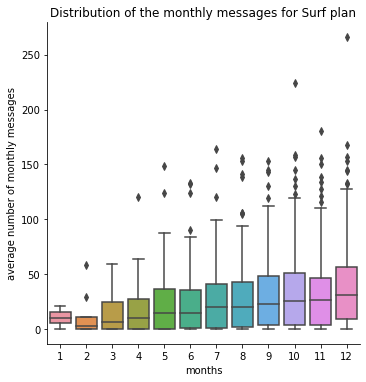

In [74]:
msgs_surf = df_merged.query('plan_name == "surf"')
sns.catplot(y='messages', x='month', data=msgs_surf, kind='box')
plt.title('Distribution of the monthly messages for Surf plan')
plt.ylabel('average number of monthly messages')
plt.xlabel('months')

Text(0.5, 6.79999999999999, 'months')

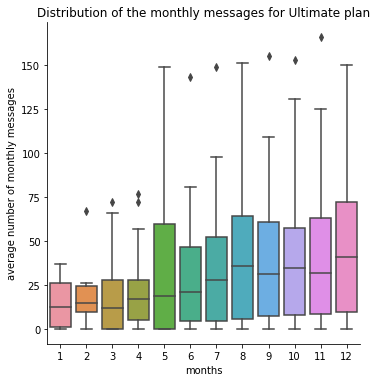

In [75]:
msgs_ult = df_merged.query('plan_name == "ultimate"')
sns.catplot(y='messages', x='month', data=msgs_ult, kind='box')
plt.title('Distribution of the monthly messages for Ultimate plan')
plt.ylabel('average number of monthly messages')
plt.xlabel('months')

The users of Ultimate plan tend to send on average more messages, comparing to Surf plan users. For Surf plan users, the mean is much greater than the median, therefore, there're many outliers on the upper side.  
For Ultimate user, the median devides the IQR (between Q1 and Q3) almost in the middle.   
Even though Ultimate plan includes more messages, more Surf users tend to send larger number of messages. Maybe because it's cheaper than a short call. 
December is the busiest months for both plans in terms of messages.
November and December are top months for Ultimate plan users sending the messages. 

### Internet

**Let's compare the amount of internet traffic consumed by users per plan. Let's plot a boxplot to visualize the distribution of the monthly traffic by users**

Text(0.5, 0, 'plans')

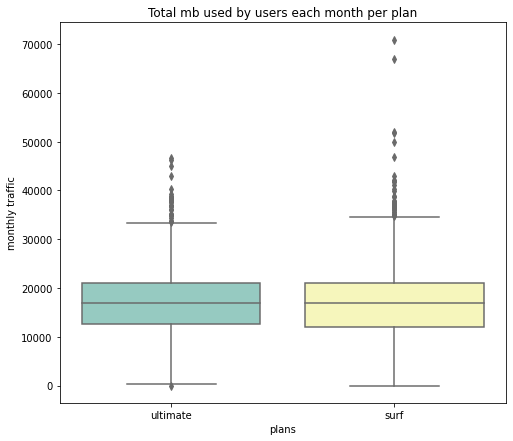

In [76]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan_name',y="total_mb_used",
                 data=df_merged, palette="Set3")
plt.title('Total mb used by users each month per plan')
plt.ylabel('monthly traffic')
plt.xlabel('plans')

In [77]:
df_merged.groupby('plan_name')['total_mb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,16558.283490,8013.513327,0.0,11986.520,16829.31,20999.6100,70931.59
ultimate,720.0,17214.699694,7851.897435,0.0,12666.955,16858.34,21014.5275,46595.33


In [78]:
mean_surf_traf=df_merged.query('plan_name == "surf"')['total_mb_used'].mean()
var_surf_traf=df_merged.query('plan_name == "surf"')['total_mb_used'].var()

mean_ult_traf=df_merged.query('plan_name == "ultimate"')['total_mb_used'].mean()
var_ult_traf=df_merged.query('plan_name == "ultimate"')['total_mb_used'].var()

print('Surf plan')
print("Average monthly traffic for 'surf' plan is",mean_surf_traf, "mb")
print("Variance for 'surf' plan is",var_surf_traf)
print()
print('Ultimate plan')
print("Average monthly traffic  for 'ultimate' plan is",mean_ult_traf, "mb")
print("Variance for 'ultimate' plan is",var_ult_traf)

Surf plan
Average monthly traffic for 'surf' plan is 16558.283490146216 mb
Variance for 'surf' plan is 64216395.838027954

Ultimate plan
Average monthly traffic  for 'ultimate' plan is 17214.699694444447 mb
Variance for 'ultimate' plan is 61652293.32385832


Text(0.5, 6.79999999999999, 'months')

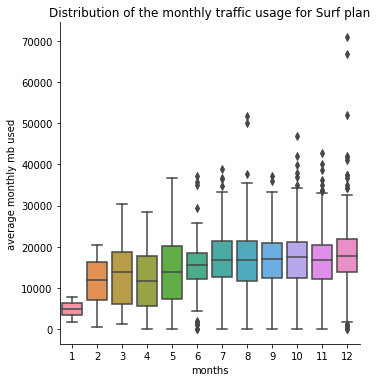

In [79]:
traf_surf = df_merged.query('plan_name == "surf"')
sns.catplot(y='total_mb_used', x='month', data=traf_surf, kind='box')
plt.title('Distribution of the monthly traffic usage for Surf plan')
plt.ylabel('average monthly mb used')
plt.xlabel('months')

Text(0.5, 6.79999999999999, 'months')

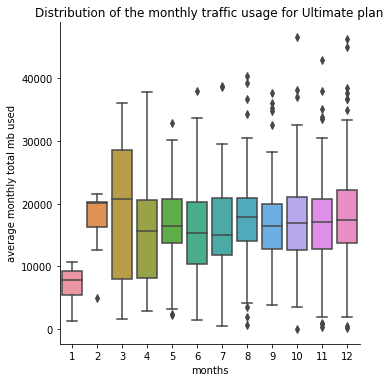

In [80]:
traf_ult = df_merged.query('plan_name == "ultimate"')
sns.catplot(y='total_mb_used', x='month', data=traf_ult, kind='box')
plt.title('Distribution of the monthly traffic usage for Ultimate plan')
plt.ylabel('average monthly total mb used')
plt.xlabel('months')

In [81]:
traf_pivot=df_merged.pivot_table(index='month', values='total_mb_used', columns = 'plan_name', aggfunc = 'mean')
traf_pivot.columns = ['surf mean', 'ultimate mean']
traf_pivot

,surf mean,ultimate mean
month,,
1,4874.860000,6918.092500
2,12178.843333,17128.808571
3,13345.440000,18321.518333
4,11984.203000,16121.654762
5,13936.354935,16624.482414
6,15301.529175,15337.921064
7,16783.600579,16344.744407
8,16795.331358,17814.720141
9,16591.431289,16969.869535


Even though the Ultimate plan includes twice as much internet data, the median of total mb used each month is almost the same for both plans. However, the mean for the Surf plan users is smaller than the median. For Ultimate plan users, the mean is greater than the median. This means that in Surf plan there are outliers on the lower side - some users tend to use very little traffic, as opposed to the Ultimate plan users, who tend to use more traffic. This must be due to the fact that Surf users pay more for every exceeded gb, and the gb's are rounded up.
Here as well, December is the busiest month in terms of internet traffic for both plans. Just above October and August.

## Revenue

**Just like we have studied the user behaviour, let's statistically describe the revenue between the plans.**

Text(0.5, 0, 'plans')

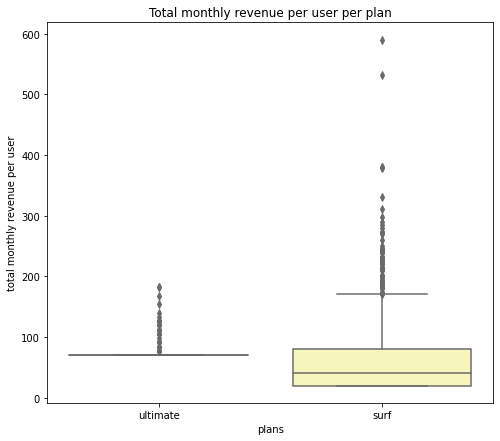

In [82]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan_name',y="total_monthly_revenue",
                 data=df_merged, palette="Set3")
plt.title('Total monthly revenue per user per plan')
plt.ylabel('total monthly revenue per user')
plt.xlabel('plans')

In [83]:
mean_surf_rev=df_merged.query('plan_name == "surf"')['total_monthly_revenue'].mean()
var_surf_rev=df_merged.query('plan_name == "surf"')['total_monthly_revenue'].var()

mean_ult_rev=df_merged.query('plan_name == "ultimate"')['total_monthly_revenue'].mean()
var_ult_rev=df_merged.query('plan_name == "ultimate"')['total_monthly_revenue'].var()

print('Surf plan')
print("Average monthly revenue for 'surf' plan is",mean_surf_rev, "usd")
print("Variance for 'surf' plan is",var_surf_rev)
print()
print('Ultimate plan')
print("Average monthly revenue  for 'ultimate' plan is",mean_ult_rev, "usd")
print("Variance for 'ultimate' plan is",var_ult_rev)

Surf plan
Average monthly revenue for 'surf' plan is 60.706408137317226 usd
Variance for 'surf' plan is 3067.835152293878

Ultimate plan
Average monthly revenue  for 'ultimate' plan is 72.31388888888888 usd
Variance for 'ultimate' plan is 129.8484855509195


In [84]:
revenue_pivot=df_merged.pivot_table(index='month', values='total_monthly_revenue', columns = 'plan_name', aggfunc = 'mean')
revenue_pivot.columns = ['surf mean', 'ultimate mean']
revenue_pivot

,surf mean,ultimate mean
month,,
1,20.000000,70.000000
2,34.396667,70.000000
3,45.941304,74.666667
4,40.710600,73.000000
5,47.628182,70.724138
6,49.276289,71.638298
7,62.674050,71.898305
8,63.931173,72.859155
9,58.271495,72.034884


Text(0.5, 6.79999999999999, 'months')

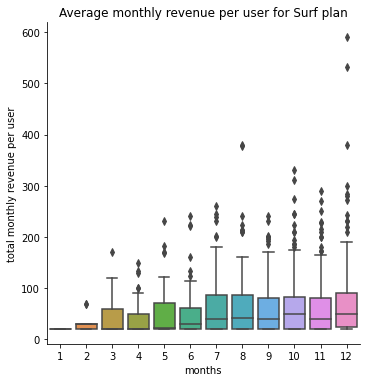

In [85]:
rev_surf = df_merged.query('plan_name == "surf"')
sns.catplot(y='total_monthly_revenue', x='month', data=rev_surf, kind='box')
plt.title('Average monthly revenue per user for Surf plan')
plt.ylabel('total monthly revenue per user')
plt.xlabel('months')

Text(0.5, 6.79999999999999, 'months')

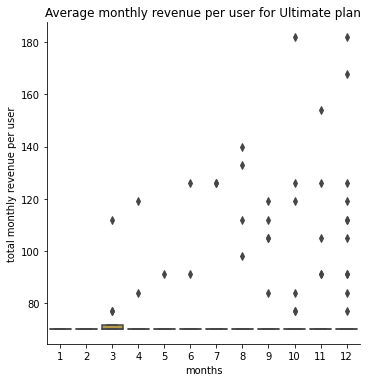

In [86]:
rev_ult = df_merged.query('plan_name == "ultimate"')
sns.catplot(y='total_monthly_revenue', x='month', data=rev_ult, kind='box')
plt.title('Average monthly revenue per user for Ultimate plan')
plt.ylabel('total monthly revenue per user')
plt.xlabel('months')

From the data it stands that on average, Ultimate users spend more money on the telecom services. However, for Surf plan users the variance is enormous. It's more than 500 times bigger than the average, whereas, for Ultimate plan users it's only twice as big. In general, as we see from the data, as the year progresses, users tend to spend more money, but Surf users tend to pay more above their basic plan payment, with December being the most expensive month for Surf users. As for the Ultimate plan user, in the box plot we can barely see the box, this is because the IQR is very small, and there's almost no variance between the amount of money users spend each month.

## Testing statistical hypotheses

**Let's test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

**H₀ null hypothesis:** there’s no difference in the average revenue from the users of Surf and Ultimate plans, and the parameters in question are equal.   
**H1 hypothesis** - The average revenue from the users of Surf plan does not equal to average revenue from the users of the Ultimate plan.   
    
Since we have users from two different plans, we need to compare the means of two different statistical populations.
We will use two-sided test as we test the hypothesis that the means of the two independent populations are equal. We will use the following method:scipy.stats.ttest_ind(array1, array2). equal_var = False - because we saw that the variance between the revenues is very different.
The statistical significance value (alpha) will be set to 0.05.

In [87]:
surf_users = df_merged.query('plan_name == "surf"')
surf_users

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,7.0,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,4.0,60.00
5,1001,12,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,1194,12,0.0,0.0,56.0,31088.49,surf,50,15360,500,20,10,0.03,0.03,16.0,180.18
2286,1349,10,0.0,0.0,76.0,13093.55,surf,50,15360,500,20,10,0.03,0.03,0.0,20.78
2287,1349,11,0.0,0.0,72.0,17128.26,surf,50,15360,500,20,10,0.03,0.03,2.0,40.66
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,20.33


In [88]:
ult_users = df_merged.query('plan_name == "ultimate"')
ult_users

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
19,1006,11,2.0,10.0,15.0,2068.37,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
20,1006,12,9.0,59.0,139.0,32118.82,ultimate,1000,30720,3000,70,7,0.01,0.01,2.0,84.0
26,1008,10,71.0,476.0,21.0,17106.99,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
27,1008,11,63.0,446.0,37.0,23676.72,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1204,12,0.0,0.0,78.0,36730.05,ultimate,1000,30720,3000,70,7,0.01,0.01,6.0,112.0
2285,1224,6,0.0,0.0,5.0,2966.21,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.0


In [89]:
# Testing the hypotheses
def t_test(surf_users,ult_users,alpha=0.05):
    p_value=stats.ttest_ind(surf_users,ult_users, equal_var=False, nan_policy='omit').pvalue
    if p_value<alpha:
        print('Reject H0: average revenue from Surf plan is not equal to average revenue from Ultimate plan users')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that average revenue from Surf plan and average revenue from Ultimate plan users are not the same")

In [90]:
t_test(surf_users['total_monthly_revenue'],ult_users['total_monthly_revenue'],alpha=0.05)

Reject H0: average revenue from Surf plan is not equal to average revenue from Ultimate plan users


**Let's now test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

**H₀ - null hypothesis:** there’s no difference in the average revenue from the users who live in NY-NJ area and users who live in other areas, and the parameters in question are equal.   
**H1 hypothesis** - The average revenue from the users who live in NY-NJ area does not equal to average revenue from the users who live in other areas.   
    
    
Since we have users from two different georgraphic area, we need to compare the means of two different statistical populations.
We will use two-sided test as we test the hypothesis that the means of the two independent populations are equal. We will use the following method:scipy.stats.ttest_ind(array1, array2, equal_var). equal_var=True - because we are not sure that the variance is not equal.
The statistical significance value (alpha) will be set to 0.05.

In [91]:
users.city.unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [92]:
def area_cat(i):
    
    if 'NJ' in i or 'NY' in i:
        return 'NY-NJ'
    else:
        return 'other'

In [93]:
users['resid_area'] = users['city'].apply(area_cat)
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,resid_area
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10,other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1,other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5,other
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,9,NY-NJ
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,2,other
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,12,other
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2,NY-NJ


In [94]:
users_area = users[['user_id', 'resid_area']]
users_area

,user_id,resid_area
0,1000,other
1,1001,other
2,1002,other
3,1003,other
4,1004,other
...,...,...
495,1495,NY-NJ
496,1496,other
497,1497,other
498,1498,NY-NJ


In [95]:
df_merged = df_merged.merge(right=users_area, on='user_id', how='left')
df_merged

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue,resid_area
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00,other
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,7.0,90.09,other
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,4.0,60.00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,20.33,other
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00,NY-NJ
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00,other


In [96]:
ny_nj_users = df_merged[df_merged['resid_area'] == 'NY-NJ']
ny_nj_users

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue,resid_area
56,1014,11,28.0,163.0,9.0,1175.59,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,NY-NJ
57,1014,12,150.0,1114.0,64.0,7792.41,surf,50,15360,500,20,10,0.03,0.03,0.0,38.84,NY-NJ
75,1022,5,39.0,302.0,0.0,4908.08,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,NY-NJ
76,1022,6,76.0,490.0,0.0,23436.48,surf,50,15360,500,20,10,0.03,0.03,8.0,100.00,NY-NJ
77,1022,7,70.0,475.0,0.0,9933.15,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,NY-NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1080,10,0.0,0.0,59.0,30161.57,surf,50,15360,500,20,10,0.03,0.03,15.0,170.27,NY-NJ
2262,1080,11,0.0,0.0,50.0,33559.88,surf,50,15360,500,20,10,0.03,0.03,18.0,200.00,NY-NJ
2263,1080,12,0.0,0.0,61.0,24543.42,surf,50,15360,500,20,10,0.03,0.03,9.0,110.33,NY-NJ
2264,1089,12,0.0,0.0,27.0,16597.91,surf,50,15360,500,20,10,0.03,0.03,2.0,40.00,NY-NJ


In [97]:
other_area_users = df_merged[df_merged['resid_area'] == 'other']
other_area_users

,user_id,month,calls,minutes_charged,messages,total_mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_charged,total_monthly_revenue,resid_area
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00,other
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,7.0,90.09,other
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,4.0,60.00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1349,11,0.0,0.0,72.0,17128.26,surf,50,15360,500,20,10,0.03,0.03,2.0,40.66,other
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,20.33,other
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,20.00,other
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,70.00,other


In [98]:
# Testing the hypotheses
def t_test(ny_nj_users,other_area_users,alpha=0.05):
    p_value=stats.ttest_ind(ny_nj_users,other_area_users, nan_policy='omit').pvalue
    if p_value<alpha:
        print('Reject H0: average revenue from users who live in NY-NJ area is not equal to average revenue from users who live in other areas')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that average revenue from users, who live in NY-NJ area, and average revenue from users, who live in other areas, are not the same")

In [99]:
t_test(ny_nj_users['total_monthly_revenue'],other_area_users['total_monthly_revenue'],alpha=0.05)

Fail to Reject H0: We don't have enough evidence to say that average revenue from users, who live in NY-NJ area, and average revenue from users, who live in other areas, are not the same


## General conclusion

**Steps taken:** 
1. Examining the data - getting general impression.
2. Fixing any issues with the data
3. Enriching the data with additional variables and columns in order to conduct calculations and analysis. 
4. Aggregating the data into fewer data files in order to be able to see the complete data and run calculations.
5. Conducting exploratory data analysis and draw conclusions based on visualization. 
6. Conducting statistical data analysis comparing the revenues from the two plans to find out which of the plans brings in more revenue. 

The main hypothesis of the study was that there is a difference between the revenue from the two plans, and a cheaper plan brings in more revenue, as its users will tend to exceed their limit more.

We had five data files which were downloaded into five different dataframes. We’explored each one to get an initial understanding of the data.   
    
**Data Description**   
    
1. **Calls:**
   1.	About 27.000 rows were with 0.0 call duration. Those must have ben calls which had been made but had been unanswered, and no minutes were charged. The values were left as they were.
   2.	The call_date column was an object time. 
2. **Internet:**
   1.	The session_date column was an object type. 
3. **Messages:**
   1.	The message_date column was an object type. 
4. **Plans:**
   1.	The interned data used is in mb, however, the charge is for gb. 
   
   
**Data fixes and enrichments:**   
    
**Calls**
1.	call_date column was changed to datetime type and format.
2.	A column with month of the call was added to calculate number of calls per month.
3.	Per plan description, the charge is per minute, even if a call lasted just one second. Therefore, we've created a column with a number of full minutes per call to be able to calculate monthly revenue from calls later in this project.
**Messages**
1.	Message_date column was changed to datetime type and format 
2.	A column with month of the message was added to calculate number of messages per month.
**Internet**
1.	session_date column was converted to timedate type.
2.	A column with month of the sessions was added to calculate number of mb’s per month.
3.	About 14.000 internet sessions were with 0.0 mb_used. Per plan description, mb's are rounded up to gb's, and individual sessions are not rounded up. Therefore, we have this data as is.
4.	From the plan data we saw that even though the Surf plan is cheaper, its users pay more for exceeding the usage included in the plan.
To remember:
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.    
    
**Aggregating the data**   
- To ease the further analysis, we have aggregate the clean data per user per month in order to have just one record per user per month.   
- We’ve put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month. 
- We used a function to add a column gb_charged - how many gb’s of internet data the user would be charged for.   
    
**Studying user behaviour**   
We ‘ve calculated some useful descriptive statistics for the aggregated and merged data, which revealed an overall picture captured by the data. We have drawn plots to help the understanding. Given that the main task was to compare the plans and decide on which one is more profitable, the statistics and the plots were calculated on a per-plan basis.

   1. **Calls**   
   
   **We have compared average duration of calls per each plan per each distinct month and built a bar chart to visualize the comparison.**   
   
   - The Surf plan has the longest average call duration, comparing to the Ultimate plan.   
   - The longest average calls for Surf users are in February: maybe because of all the calls made during the St.Valentines. They are also longer than the average calls made by Ultimate plan users during the same month.   
   - The Surf plan users on average also make longer calls in June and December: maybe because of all the X-mas and New Year's congratulations.   
   - The longest calls for the Ultimate plan users are during July - maybe during summer vacations. The calls in July are also longer than the calls made by Surf plan users.     
   
   
   **We have compared the number of minutes users of each plan required each month and plotted a histogram to visualize the comparison. We’ve also visualized the average number of minutes users of each plan require by month by plotting a bar chart.**      
   - From the data it was evident that the Surf plan users required on average slightly less minutes, comparing to the Ultimate plan users, even though they have significantly less minutes included in their plan.   
   - Despite the fact that Surf plan users required on average slightly less minutes each month, it stand from the data that the difference between the mean and the median in monthly minutes is greater for Ultimate plan users. The mean is greater than the median, which means that it's affected by the outliers. This means that more Ultimate users tend to use more minutes. 
   - The month with the highest minutes usage is December for both plans, probably because of the holidays. However, Surf users require more minutes in December comparing to Ultimate users.   
   - For Ultimate users February and December are the months with the highest number of minutes used: probably because of St. Valentines in February and Xmas and New Year's in December. For Surf users these are July and December. No love calls in February for Surf users, maybe, because they don't love anyone (kidding :))) 
   - In general on average, Ultimate plan users use slightly more minutes and make more calls every month.  
  

**We have calculated the mean and the variance of the call duration for each plan to reason on whether users on the different plans have different behaviours for their calls.**

   - It was evident from the data that in Surf plan the mean call duration was greater (6.94) comparing to the Ultimate plan (6.84). However, the variance in Ultimate plan was greater than in Surf plan. This means that more Ultimate users tend to make longer calls. Which is logical, as the plan includes more minutes.   
   
**We have plotted a boxplot to visualize the distribution of the monthly call duration.**   
   
   - The IQR the Surf users' call duration was smaller than for Ultimate users. The variance is smaller than for the Ultimate users, thus, most users are concentrated around the average. 
    - From the graph we saw the outliers on the upper side. However, calls below 6.7 min were considered to be outliers for Surf plan. The Surf users may have avoided making short unnecessary calls not to waste minutes, as even a part or a minute is charged as a full minute.   
    - As for the Ultimate user, the lower side outliers were as low as 6.4 minutes, which means that the Ultimate plan users don't hesitate to make shorter calls. The variance from the mean was greater comparing to the Surf plan, and there're outliers on the upper side, which means more Ultimate users tend to make longer calls.   

   2. **MESSAGES**   

   **We’ve compared the number of messages users of each plan tend to send each month and plotted a boxplot to visualize the distribution of the monthly messages sent by users.**   
   
   - The users of Ultimate plan tend to send on average more messages, comparing to Surf plan users. For Surf plan users, the mean is much greater than the median, therefore, there're many outliers on the upper side.   
   - For Ultimate user, the median devides the IQR (between Q1 and Q3) almost in the middle. 
   - Even though, Ultimate plan includes more messages, more Surf users tend to send larger number of messages. Maybe because it's cheaper than a short call.   
   - December is the busiest months for both plans in terms of messages. November and December are top months for Ultimate plan users sending the messages.

  3. **INTERNET**   

**We’ve compared the amount of internet traffic consumed by users per plan and plotted a boxplot to visualize the distribution of the monthly traffic by users**   

- Even though the Ultimate plan includes twice as much internet data, the median of total mb used each month is almost the same for both plans. However, the mean for the Surf plan users is smaller than the median. 
- For Ultimate plan users, the mean is greater than the median. This means that in Surf plan there are outliers on the lower side - some users tend to use very little traffic, as opposed to the Ultimate plan users, who tend to use more traffic. This must be due to the fact that Surf users pay more for every exceeded gb, and the gb's are rounded up.   
- Here as well, December is the busiest month in terms of internet traffic for both plans. Just above October and August.   
   
 4. **REVENUE**   
   
**Just like we have studied the user behaviour, we have statistically describe the revenue between the plans.**     

- From the data it stands that on average, Ultimate users spend more money on the telecom services. However, for Surf plan users the variance is enormous. It's more than 500 times bigger than the average, whereas, for Ultimate plan users it's only twice as big.   
- In general, as we saw from the data, as a year progressed, users tended to spend more money, but Surf users tended to pay more above their basic plan payment, with December being the most expensive month for Surf users.   
- As for the Ultimate plan user, in the box plot we can barely see the box, this is because the IQR is very small, and there's almost no variance between the amount of money users spend each month.   


**Testing statistical hypotheses**   

**We’ve tested the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

**H₀ null hypothesis:** there’s no difference in the average revenue from the users of Surf and Ultimate plans, and the parameters in question are equal.  

**H1 hypothesis** - the average revenue from the users of Surf plan does not equal to average revenue from the users of the Ultimate plan.
Since we have users from two different plans, we needed to compare the means of two different statistical populations. We used two-sided test as we tested the hypothesis that the means of the two independent populations were equal. We have used the following method:scipy.stats.ttest_ind(array1, array2). equal_var = False - because we saw that the variance between the revenues is very different. The statistical significance value (alpha) was set to 0.05.   

  **Test Result**   
  Reject H0: average revenue from Surf plan is not equal to average revenue from Ultimate plan users.

We’ve tested the hypothesis that the average revenue from users in the NY-NJ area was different from that of the users from the other regions.**

**H₀ - null hypothesis:** there’s no difference in the average revenue from the users who live in NY-NJ area and users who live in other areas, and the parameters in question are equal.   

**H1 hypothesis** - The average revenue from the users who live in NY-NJ area does not equal to average revenue from the users who live in other areas.
Since we had users from two different geographic area, we needed to compare the means of two different statistical populations. We have used two-sided test as we tested the hypothesis that the means of the two independent populations are equal. We used the following method:scipy.stats.ttest_ind(array1, array2, equal_var). equal_var=True - because we are not sure that the variance is not equal. The statistical significance value (alpha) was set to 0.05.   

  **Test Result**   
  Fail to Reject H0: We don't have enough evidence to say that average revenue from users, who live in NY-NJ area, and average revenue from users, who live in other areas, are not the same.


For holidays, Surf users prefer to call, whereas, Ultimate users prefer sending messages. 

**The bottomline:**
Even though the Ultimate plan is more expensive, there average monthly spending of the users are similar. Surf users tend to spend more beyong their included minutes, messages, and internet data. So the difference between what they initially paid for and what they spent is great. It seems that the Surf plan is more profitable for the company. 